## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

### Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. 

### Given:
"Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Preprocessing:

#### Read the data

In [5]:
data = pd.read_csv("./adult_with_headers.csv")

In [6]:
df1 = data.copy()

In [5]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df1.shape

(32561, 15)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### checking for duplicates

In [9]:
df1[df1.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [10]:
df1.drop_duplicates(inplace=True)
df1.shape

(32537, 15)

In [11]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

#### checking for missing values

In [12]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

####  no missing values detected 

In [13]:
!pip install --upgrade pandas

^C


In [14]:
import pandas as pd
print(pd.__version__)

2.3.0


### Automating EDA process

In [25]:
import ydata_profiling as pp

In [26]:
report = pp.ProfileReport(df1)

In [27]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/15 [00:00<?, ?it/s]
%|███████████                                                                        | 2/15 [00:00<00:01,  9.61it/s]
%|████████████████▌                                                                  | 3/15 [00:00<00:01,  7.71it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 30.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
gain_zero_pct = (df1['capital_gain'] == 0).mean() * 100
loss_zero_pct = (df1['capital_loss'] == 0).mean() * 100

print(f"Capital Gain Zero %: {gain_zero_pct:.2f}%")
print(f"Capital Loss Zero %: {loss_zero_pct:.2f}%")

Capital Gain Zero %: 91.66%
Capital Loss Zero %: 95.33%


#### -> From the report capital_gain and capital_loss look highly skewed 

In [16]:
%matplotlib inline

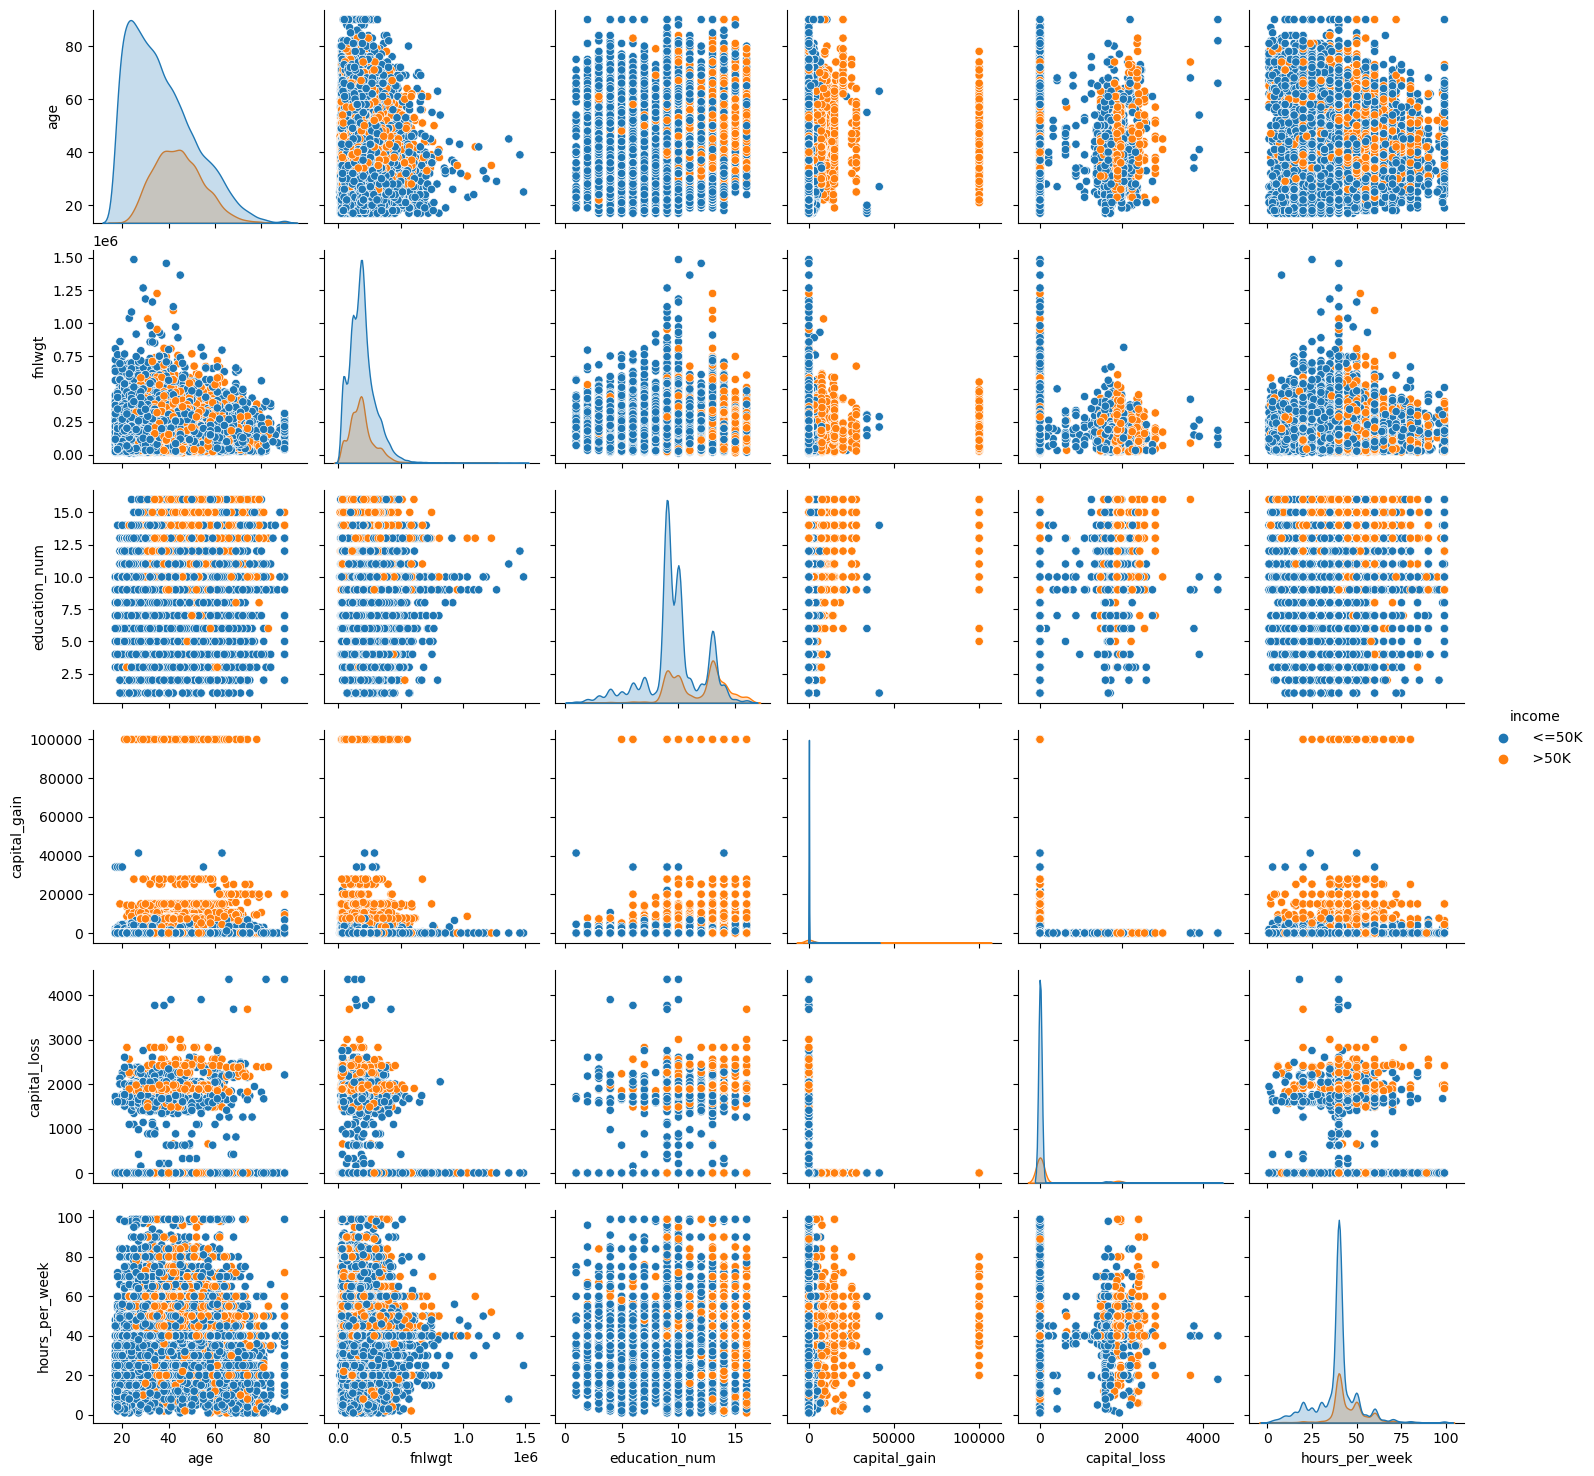

In [17]:
sns.pairplot(df1, hue='income')
plt.show()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


#### Numerical and Categorical columns

In [19]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
cat_cols = df1.select_dtypes(include='object').columns

## Applying scaling techniques to numerical features

In [28]:
from sklearn.preprocessing import StandardScaler

### Standard Scaling (Z-score normalization)

In [29]:
scaler = StandardScaler()

In [30]:
std_scaled_data = scaler.fit_transform(df1[num_cols])

In [31]:
scaled_df1 = pd.DataFrame(std_scaled_data, columns=num_cols)

In [32]:
scaled_df1.head(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483


### Min-Max Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
minmax_scaler = MinMaxScaler()

In [35]:
minmax_scaled_data = minmax_scaler.fit_transform(df1[num_cols])

In [36]:
scaled_df2 = pd.DataFrame(minmax_scaled_data, columns=num_cols)

In [37]:
scaled_df2.head(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.8,0.02174,0.0,0.397959
1,0.452055,0.048238,0.8,0.00000,0.0,0.122449


#### 	Discuss the scenarios where each scaling technique is preferred and why

#### Standard Scaling (Z-score Normalization)
Standard Scaling centers data around 0 with a standard deviation of 1.

It is referred when data is normally distributed or approximately symmetric.Commonly used for algorithms that assume standardized data. These algorithms include, Linear Regression, Logistic Regression, SVM, PCA, K-Means Clustering.

It is not recommended when the data is highly skewed or contains outliers, as mean and standard deviation are sensitive to extreme values.

#### Min-Max Scaling (Normalization)
Min-Max Scaling scales data to a fixed range, typically 0 to 1.

It is preferred when it is important to preserve the shape of the original distribution while compressing the scale.Commonly used for algorithms that rely on distance calculations including, KNN, K-Means Clustering, Neural Networks.

It is not recommended when the dataset contains significant outliers, as they can distort the scaling of the rest of the values.

#### To summarise,
It is better to use Standard Scaling when the data is normally distributed or required by models sensitive to feature scales. And use Min-Max Scaling for algorithms that depend on distance measures or when preparing data for neural networks.

Both scaling techniques are sensitive to outliers, so it’s important to handle outliers before applying these methods.

## Encoding Techniques - Encoding Categorical Columns

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### One-Hot Encoding to categorical variables with less than 5 categories

In [39]:
one_hot_cols = [col for col in cat_cols if df1[col].nunique() <= 5]

In [40]:
one_hot_cols

['race', 'sex', 'income']

#### Using pd.get_dummies() - pandas implementation of one-hot encoding

In [41]:
df1_onehot = pd.get_dummies(df1[one_hot_cols], drop_first=True)

In [42]:
df1_onehot.head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,False,False,False,True,True,False
1,False,False,False,True,True,False
2,False,False,False,True,True,False
3,False,True,False,False,True,False
4,False,True,False,False,False,False


#### Using OneHotEncoder from sklearn

In [43]:
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [44]:
onehot_encoded = onehot_encoder.fit_transform(df1[one_hot_cols])

In [45]:
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(one_hot_cols))

In [46]:
onehot_df.head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


### Label Encoding for categorical variables with more than 5 categories

In [47]:
label_enc_cols = [col for col in cat_cols if df1[col].nunique() > 5]

In [48]:
label_enc_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [49]:
label_encoder = LabelEncoder()

In [50]:
for col in label_enc_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [51]:
df1[label_enc_cols].head()

,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5


In [52]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K


In [53]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Discuss the pros and cons of One-Hot Encoding and Label Encoding

### Pros and Cons of One-Hot Encoding

**Pros**

* Converts categorical variables into a binary format, making them suitable for machine learning models.
* No ordinal relationship is assumed between categories.
* Works well when the number of unique categories is small.

**Cons**

* Can lead to a large number of additional columns if the number of categories is high (dimensionality issue).
* Increases memory usage and computational cost.
* May cause the curse of dimensionality in high-cardinality data, negatively affecting model performance.


### Pros and Cons of Label Encoding

**Pros**

* Simple and fast to implement.
* Does not increase the dimensionality of the dataset.
* Useful for ordinal data where the order of categories matters.

**Cons**

* Introduces an implicit ordinal relationship between categories, which may not exist.
* Can mislead machine learning algorithms into interpreting numerical values as having order or magnitude.
* Not suitable for nominal (unordered) categorical variables as it can bias the model.


## Feature Engineering

### Creating  new features that could be beneficial for the model. 


In [54]:
# Binning 'age' into categories
df1['age_group'] = pd.cut(df1['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

In [55]:
# Create a ratio feature: working hours per age
df1['hours_per_age'] = df1['hours_per_week'] / df1['age']

In [56]:
# Check new features
df1[['age', 'age_group', 'hours_per_week', 'hours_per_age']].head()

,age,age_group,hours_per_week,hours_per_age
0,39,Middle-aged,40,1.025641
1,50,Middle-aged,13,0.260000
2,38,Middle-aged,40,1.052632
3,53,Senior,40,0.754717
4,28,Young,40,1.428571


In [57]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,hours_per_age
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K,Middle-aged,1.025641
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K,Middle-aged,0.260000
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K,Middle-aged,1.052632
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K,Senior,0.754717
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K,Young,1.428571


### Explain the rationale behind your choices.
Age Group → Helps capture non-linear effects of age (e.g., young vs senior earning patterns)

Hours per Age → Normalizes working hours relative to age, might reveal over/under-working patterns by age


### Transforming (e.g., log transformation) to at least one skewed numerical feature 

In [58]:
# Check skewness of numeric columns
df1.select_dtypes(include='number').skew()

age                0.557663
workclass         -0.751598
fnlwgt             1.447703
education         -0.934160
education_num     -0.309500
marital_status    -0.012753
occupation         0.114586
relationship       0.786548
capital_gain      11.949403
capital_loss       4.592702
hours_per_week     0.228759
native_country    -3.661128
hours_per_age      0.747749
dtype: float64

In [59]:
# Apply log transformation (add 1 to avoid log(0))
df1['log_capital_gain'] = np.log1p(df1['capital_gain'])

# Check before and after
df1[['capital_gain', 'log_capital_gain']].head()

,capital_gain,log_capital_gain
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


### Justification for choosing capital_gain to perform log tranformation
 From the EDA report and the pairplot capital_gain and capital_loss look highly skewed. Here, capital_gain is used.
 Log tranformation reduces skew, making it more normally distributed and improving model performance on algorithms sensitive to distribution

## Feature Selection

### Isolation Forest algorithm to identify and remove outliers

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
num_cols = df1.select_dtypes(include='number').columns

In [9]:
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% as outliers

In [10]:
# Fit and predict outliers
outliers = iso_forest.fit_predict(df1[num_cols])

In [11]:
# Add result to DataFrame
df1['outlier'] = outliers

In [12]:
# Remove outliers (outlier = -1)
df_no_outliers = df1[df1['outlier'] != -1].drop(columns='outlier')

In [13]:
print("Original shape:", df1.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (32561, 16)
After removing outliers: (31909, 15)


#### Discuss how outliers can affect model performance

Using the Isolation Forest algorithm with a contamination parameter of 0.02, we detected and removed approximately 651 outliers from the dataset.
Outliers can skew model performance, especially in distance-based or variance-sensitive models (like k-NN, SVM, or Linear Regression), and may lead to inaccurate predictions. Removing these ensures that the model learns from typical patterns in the data.

### Apply the PPS (Predictive Power Score) to find the relationships between features

!pip install ppscore

In [1]:
import pandas as pd
print(pd.__version__)

1.5.3


In [2]:
import ppscore as pps

In [17]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

In [18]:
# Top relationships
pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10)

,x,y,ppscore
0,age,age,1.0
16,workclass,workclass,1.0
208,native_country,native_country,1.0
192,hours_per_week,hours_per_week,1.0
176,capital_loss,capital_loss,1.0
160,capital_gain,capital_gain,1.0
144,sex,sex,1.0
128,race,race,1.0
96,occupation,occupation,1.0
80,marital_status,marital_status,1.0


#### NOTE:
These all being 1.0 is expected because a feature perfectly predicts itself.

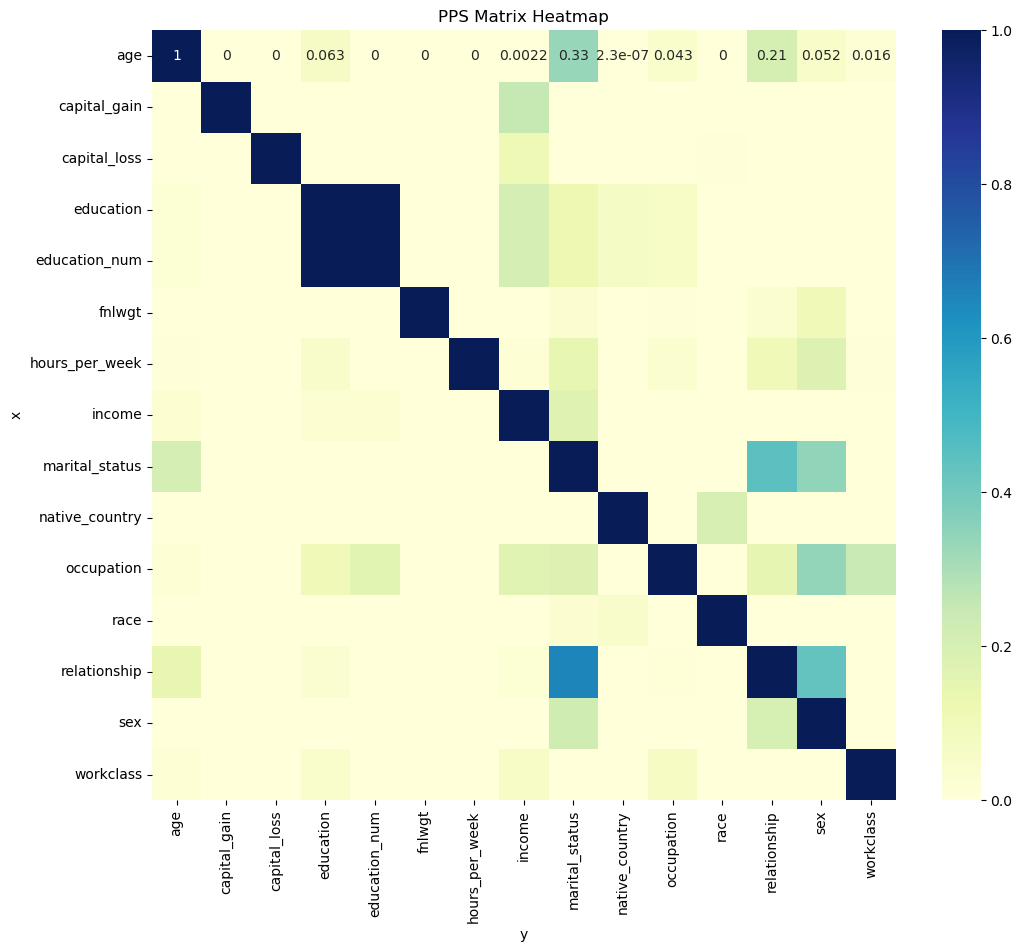

In [19]:
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

# Set figure size
plt.figure(figsize=(12, 10))

# Plot heatmap
sns.heatmap(pps_pivot, annot=True, cmap='YlGnBu')
plt.title("PPS Matrix Heatmap")
plt.show()

### PPS Matrix Heatmap Interpretation
The Predictive Power Score (PPS) is a score between 0 and 1 that measures how well one feature can predict another (asymmetrically). Unlike correlation, it can capture non-linear relationships and works with categorical variables as well.

### Predictive Relationships (non-trivial)

relationship - income: ~0.33

Strongest cross-feature predictive score.

Shows that relationship status helps predict income category.

marital_status - relationship: ~0.30

Makes sense — marital status and relationship status are closely related.

education_num - education: ~0.21

Logical, since education_num is a numerical representation of education.

occupation - income: ~0.24

Occupation has moderate predictive power over income.

sex - relationship: ~0.21

Gender can weakly predict relationship status.

age - marital_status: ~0.21

Age has weak but notable predictive power for marital status.

### Poor Predictors

Features like fnlwgt, race, and native_country have low PPS with others, suggesting they are poor predictors of most other fields.

This also means they may not contribute much in a predictive model unless more complex relationships exist.


### Compare PPS findings with the correlation matrix.

### Correlation Matrix

In [28]:
# Correlation matrix
corr_matrix = df_no_outliers.corr()
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076454,0.031052,0.104117,0.033621,0.072892
fnlwgt,-0.076454,1.000000,-0.043219,-0.006929,-0.018000,-0.021950
education_num,0.031052,-0.043219,1.000000,0.143836,0.065145,0.140358
capital_gain,0.104117,-0.006929,0.143836,1.000000,-0.044871,0.084918
capital_loss,0.033621,-0.018000,0.065145,-0.044871,1.000000,0.035584
hours_per_week,0.072892,-0.021950,0.140358,0.084918,0.035584,1.000000


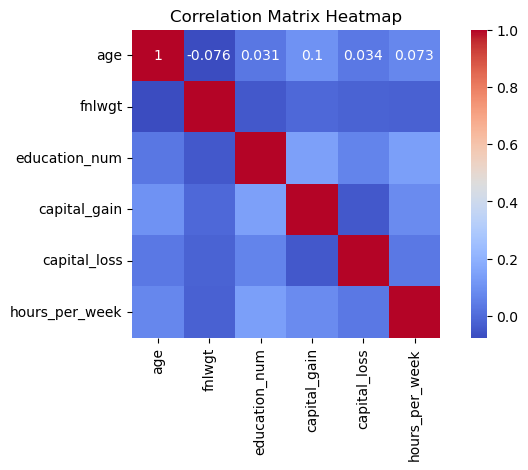

In [29]:
# Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Comparison of PPS Matrix vs Correlation Matrix

#### 1. Nature of Relationships Captured

* Correlation Matrix captures linear, symmetric relationships.
* PPS Matrix captures non-linear, asymmetric relationships and works with both numerical and categorical features.

#### 2. Predictive Power

* Correlation values are limited to showing mutual association. For example:

  * education_num and capital_gain: low correlation (~0.1), suggesting weak linear association.
* PPS can highlight directional prediction power:

  * relationship → income: PPS ≈ 0.33, showing good predictive ability even if correlation is low.

#### 3. Symmetry

* Correlation is symmetric: corr(A, B) = corr(B, A).
* PPS is asymmetric: pps(A → B) ≠ pps(B → A). This makes PPS more suitable for understanding which feature helps predict another, useful for modeling.

#### 4. Interpretation of Low Scores

* In the correlation matrix, many values are close to 0, implying weak or no linear relationships (e.g., between fnlwgt and others).
* In the PPS matrix, most values are also low, but it still highlights features that have predictive power even in non-linear forms, such as:

  * occupation → income
  * education_num → education
  * age → marital_status

#### 5. Use Cases

* Use correlation to check linear redundancy and multicollinearity in numerical data.
* Use PPS to find important predictive features regardless of data type or linearity, especially when building classification or regression models.


The PPS matrix provides deeper insight into predictive relationships in a dataset, especially when dealing with mixed data types or building ML models. Correlation is simpler and useful for quick numeric analysis, but misses many relationships that PPS captures.
